[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [12]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Step 2

Load the model for testing

In [13]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))

#### Step 3

Open and parse the test data CSV file and store the data as variable array data objects.



In [14]:
mx_col = [
    'budget', 'release_quarter', 'rating','is_sequel', 'country', 'runtime',
    'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
    'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
    'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
    'genre_Sport', 'genre_Thriller', 'genre_Western'
]
testing_data = pd.read_csv('testing_data1.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

#### Step 4

Plot the test data features, targets and multiple variable linear regression model to visually evaluate the model.


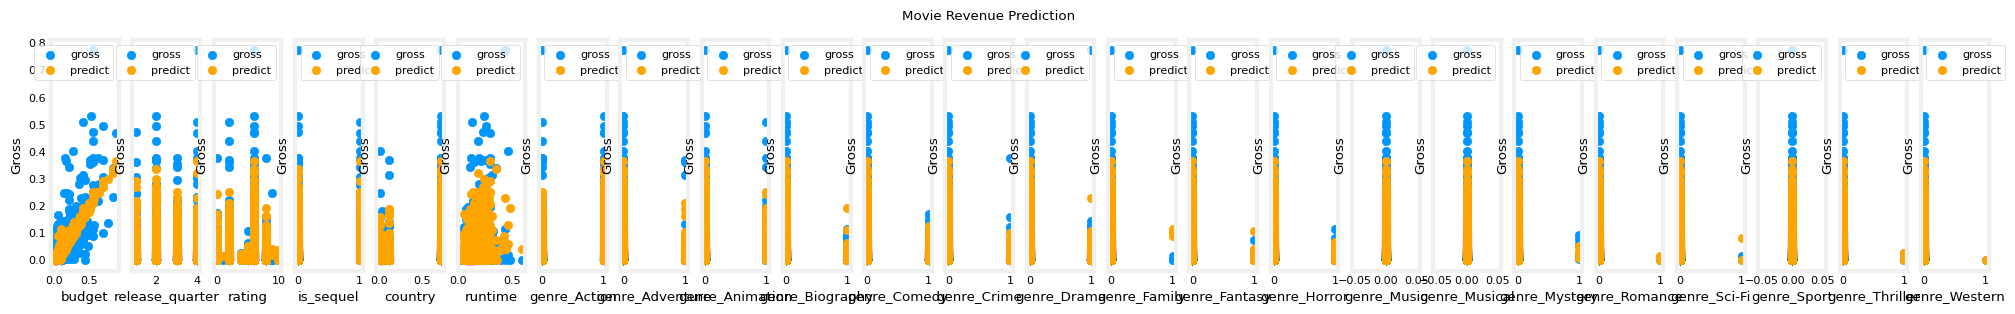

In [15]:
my_pred = model_A.predict(mx_test)
my_pred = np.maximum(my_pred, 0)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(25,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

#### Step 5

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [25]:
test_score = model_A.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5371299657539694


#### Step 6

 Manual Prediction

In [24]:
# Example input data
#   'budget', 'release_quarter', 'rating','is_sequel', 'country', 'runtime',
#   'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
#   'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
#   'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
#   'genre_Sport', 'genre_Thriller', 'genre_Western'

# Reshape the input array to 2D
input_data = np.array([0.1685323190925766, 2, 6, 0, 0.7190388170055453, 0.1848184818481848, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Predict using the reshaped input
my_pred = model_A.predict(input_data)
my_pred = np.maximum(my_pred, 0)  # Ensure non-negative prediction
print(f"Predicted gross revenue: {my_pred[0]}")

Predicted gross revenue: 0.0613677227661081


Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [21]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['gross'] = my_test
data['Predicted result'] = np.maximum(model_A.predict(mx_test), 0)  # Clip negative predictions
data['Cost'] = my_test - np.maximum(model_A.predict(mx_test), 0).round(2)  # Use clipped predictions

table = pd.DataFrame(data)
print(table[['gross', 'Predicted result', 'Cost']])

         gross  Predicted result      Cost
0     0.037800          0.027824  0.007800
1     0.005149          0.000000  0.005149
2     0.000990          0.006986 -0.009010
3     0.023772          0.005571  0.013772
4     0.002220          0.027465 -0.027780
...        ...               ...       ...
1875  0.002016          0.020953 -0.017984
1876  0.000324          0.015672 -0.019676
1877  0.002049          0.003460  0.002049
1878  0.046193          0.035809  0.006193
1879  0.004437          0.000000  0.004437

[1880 rows x 3 columns]


Prints the intercept and coefficient(s) of my trained model 

In [22]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.032348956598661834
Coefficient: [ 3.81513400e-01  4.80066690e-04 -1.53134183e-04  1.52255055e-02
  1.66724524e-02  9.84205093e-02 -8.00056591e-04 -2.34572404e-04
  2.16891396e-02 -6.37402730e-03 -3.61422507e-03 -6.31013832e-03
 -8.21862927e-03  7.90379019e-02  5.08600675e-03  9.20788937e-03
 -2.37445041e-02 -3.70022669e-02  3.02595629e-03 -9.56508180e-03
  2.15604805e-03 -2.81284479e-02  3.88586134e-03 -9.68536980e-05]


These are the weights for each input feature, in the same order as my feature columns (`mx_col`).

Each coefficient tells me how a unit change in the corresponding feature affects the prediction, holding all else constant:

In [23]:
for feature, coef in zip(mx_col, model_A.coef_):
    print(f"{feature}: {coef:.4f}")


budget: 0.3815
release_quarter: 0.0005
rating: -0.0002
is_sequel: 0.0152
country: 0.0167
runtime: 0.0984
genre_Action: -0.0008
genre_Adventure: -0.0002
genre_Animation: 0.0217
genre_Biography: -0.0064
genre_Comedy: -0.0036
genre_Crime: -0.0063
genre_Drama: -0.0082
genre_Family: 0.0790
genre_Fantasy: 0.0051
genre_Horror: 0.0092
genre_Music: -0.0237
genre_Musical: -0.0370
genre_Mystery: 0.0030
genre_Romance: -0.0096
genre_Sci-Fi: 0.0022
genre_Sport: -0.0281
genre_Thriller: 0.0039
genre_Western: -0.0001


These results show that budget and runtime are the strongest positive predictors of movie revenue, meaning higher budgets and longer runtimes tend to generate more gross. Certain genres like Family and Animation also contribute positively, while genres such as Drama, Musical, and Romance slightly reduce expected revenue. Smaller effects are seen from features like sequel status, release quarter, and rating, indicating their influence is present but limited.